<a href="https://colab.research.google.com/github/JozefV99/Master-Thesis/blob/main/experiments/EXPERIMENT_1_YOLOv8l_MEDIUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPERIMENT 1 - YOLOv8l - MEDIUM**

This code trains the YOLOv8l model on the medium complexity dataset, providing training, validation, and testing results, including visualizations. Testing results are based on both synthetic and traditional datasets.

# **IMPORT TRAINING DATASET:**

In [ ]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/gdrive')

# Path to your folder on Google Drive
path_to_folder = "/content/gdrive/My Drive/Colab Notebooks/Data/MEDIUM COMPLEXITY/YOLO DATASET"

# Create a main folder called 'Datasets'
images_folder_path = '/content/Datasets'
os.makedirs(images_folder_path, exist_ok=True)

# Unzipping each zip file into a separate subfolder within 'Datasets'
for zip_file in os.listdir(path_to_folder):
    if zip_file.endswith('.zip'):
        # Create a directory named after the zip file (without the .zip extension)
        # within the 'Datasets' folder
        folder_name = zip_file[:-4]
        subfolder_path = os.path.join(images_folder_path, folder_name)
        os.makedirs(subfolder_path, exist_ok=True)

        # Path to the zip file in Google Drive
        zip_path = os.path.join(path_to_folder, zip_file)

        # Unzip the files into the newly created subfolder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(subfolder_path)

print("Unzipping complete.")

# Print the final directory structure for verification
print("Contents of the 'Datasets' directory:")
!ls {images_folder_path}

Mounted at /content/gdrive
Unzipping complete.
Contents of the 'Datasets' directory:
training  validation


In [ ]:
import os

def count_files_in_directory(directory_path):
    # Initialize counters
    total_files = 0
    image_files = 0
    other_files = 0
    other_file_types = {}

    # Supported image file extensions
    image_extensions = {'.png', '.jpg', '.jpeg'}

    # Iterate through files in the directory
    for file in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, file)):
            total_files += 1
            file_extension = os.path.splitext(file)[1].lower()  # Extract file extension

            # Check file extension
            if file_extension in image_extensions:
                image_files += 1
            else:
                other_files += 1
                if file_extension in other_file_types:
                    other_file_types[file_extension] += 1
                else:
                    other_file_types[file_extension] = 1

    return total_files, image_files, other_files, other_file_types

# Specify the directory to check
directory_path = '/content/Datasets/training'

# Count the files
total_files, image_files, other_files, other_file_types = count_files_in_directory(directory_path)

# Print the counts
print(f"Total files: {total_files}")
print(f"Number of image files: {image_files}")
print(f"Number of other files: {other_files}")
print("Other file types:")
for ext, count in other_file_types.items():
    print(f"{ext}: {count}")

Total files: 80000
Number of image files: 40000
Number of other files: 40000
Other file types:
.txt: 40000


# **IMPORT TESTING DATASET:**

### **SYNTHETIC TESTING DATASET:**

In [ ]:
import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/gdrive')

def normalize_and_save(img_path, save_path):
    # Open the image file
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1] and scale back to [0, 255]
    np_img = np.array(img) / 255.0
    norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    norm_img.save(save_path)
    os.remove(img_path)  # Optionally remove the original image

def extract_and_normalize_images(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                zip_file.extractall(target_folder)
                print(f"Extracted {zip_filename} into {target_folder}")

                # Normalize each image extracted
                for filename in os.listdir(target_folder):
                    file_path = os.path.join(target_folder, filename)
                    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                        normalize_and_save(file_path, file_path)  # Save normalized image over the original

# Specify the source directory where the zips are located and the target directory
test_source = "/content/gdrive/MyDrive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/MEDIUM COMPLEXITY"
test_target = '/content/TestImages'

# Extract and normalize test set
extract_and_normalize_images(test_source, test_target)

def find_deepest_image_directory(root_folder):
    image_extensions = {'.png', '.jpg', '.jpeg'}  # Extensions to look for
    deepest_dir = None
    max_depth = -1
    directory_depths = {}

    # Walk through all directories and files in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Determine the depth of the current directory
        depth = dirpath.count(os.sep)
        directory_depths[dirpath] = depth

        # Check if there are any image files in this directory
        if any(file.lower().endswith(tuple(image_extensions)) for file in filenames):
            # Update the deepest directory info if this one is deeper
            if depth > max_depth:
                deepest_dir = dirpath
                max_depth = depth

    # Ensure the deepest directory found doesn't have any subdirectories with images
    if deepest_dir:
        for subdir in os.listdir(deepest_dir):
            subdir_path = os.path.join(deepest_dir, subdir)
            if os.path.isdir(subdir_path) and any(file.lower().endswith(tuple(image_extensions)) for file in os.listdir(subdir_path)):
                return None  # Found a subdirectory with images, return None

    return deepest_dir

# Get the deepest directory containing images
deepest_image_directory = find_deepest_image_directory(test_target)

def move_and_cleanup(original_folder, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Move each file to the new folder
    for filename in os.listdir(original_folder):
        file_path = os.path.join(original_folder, filename)
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, filename))

    # Remove the original folder
    shutil.rmtree(original_folder)
    shutil.rmtree(test_target)
    print(f"Moved all images to {new_folder} and deleted the original folder {original_folder}")

# Move the normalized images to a new directory and cleanup
final_destination = '/content/Datasets/testing'
move_and_cleanup(deepest_image_directory, final_destination)

# Print the final directory structure for verification
print("Contents of the 'Datasets' directory:")
print(os.listdir('/content/Datasets'))

Extracted RESIZED (MIXED).zip into /content/TestImages
Moved all images to /content/Datasets/testing and deleted the original folder /content/TestImages/RESIZED (MIXED)
Contents of the 'Datasets' directory:
['training', 'testing', 'validation']


In [ ]:
# GET ANNOTATIONS:

from google.colab import drive
import zipfile
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Define paths
zip_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data/SYNTHETIC TESTING DATASET/MEDIUM COMPLEXITY/Annotations/MEDIUM COMPLEXITY_Annotations.zip'
extract_dir = '/content/Datasets/synthetic_annotations'

# Create the extraction directory if it does not exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed.")

Extraction completed.


In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Define the paths to the original folders and the new folder
folder1 = '/content/Datasets/testing'
folder2 = '/content/Datasets/synthetic_annotations'
new_folder = '/content/Datasets/synthetic_testing'

# Create the new folder if it doesn't exist
os.makedirs(new_folder, exist_ok=True)

# Copy the contents of folder1 to the new folder
for item in os.listdir(folder1):
    source = os.path.join(folder1, item)
    destination = os.path.join(new_folder, item)
    if os.path.isdir(source):
        shutil.copytree(source, destination)
    else:
        shutil.copy2(source, destination)

# Copy the contents of folder2 to the new folder
for item in os.listdir(folder2):
    source = os.path.join(folder2, item)
    destination = os.path.join(new_folder, item)
    if os.path.isdir(source):
        shutil.copytree(source, destination)
    else:
        shutil.copy2(source, destination)

# Delete the original folders
shutil.rmtree(folder1)
shutil.rmtree(folder2)

print(f'Folders {folder1} and {folder2} have been merged into {new_folder} and deleted.')

Folders /content/Datasets/testing and /content/Datasets/synthetic_annotations have been merged into /content/Datasets/synthetic_testing and deleted.


### **REAL TESTING DATASET:**

In [ ]:
import os
import shutil
import zipfile
import numpy as np
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

def normalize_and_save(img_path, save_path):
    # Open the image file
    img = Image.open(img_path)
    img = img.convert('RGB')  # Convert to RGB if not already

    # Normalize pixel values to [0, 1] and scale back to [0, 255]
    np_img = np.array(img) / 255.0
    norm_img = Image.fromarray((np_img * 255).astype('uint8'))
    norm_img.save(save_path)
    os.remove(img_path)  # Optionally remove the original image

def extract_and_normalize_images(source_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for zip_filename in os.listdir(source_folder):
        if zip_filename.endswith('.zip'):
            zip_path = os.path.join(source_folder, zip_filename)
            with zipfile.ZipFile(zip_path, 'r') as zip_file:
                zip_file.extractall(target_folder)
                print(f"Extracted {zip_filename} into {target_folder}")

                # Normalize each image extracted
                for filename in os.listdir(target_folder):
                    file_path = os.path.join(target_folder, filename)
                    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                        normalize_and_save(file_path, file_path)  # Save normalized image over the original

# Specify the source directory where your test zips are located and the target directory
test_source = "/content/gdrive/MyDrive/Colab Notebooks/Data/Internet testing"
test_target = '/content/TestImages'

# Extract and normalize test set
extract_and_normalize_images(test_source, test_target)

def find_deepest_image_directory(root_folder):
    image_extensions = {'.png', '.jpg', '.jpeg'}  # Extensions to look for
    deepest_dir = None
    max_depth = -1
    directory_depths = {}

    # Walk through all directories and files in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Determine the depth of the current directory
        depth = dirpath.count(os.sep)
        directory_depths[dirpath] = depth

        # Check if there are any image files in this directory
        if any(file.lower().endswith(tuple(image_extensions)) for file in filenames):
            # Update the deepest directory info if this one is deeper
            if depth > max_depth:
                deepest_dir = dirpath
                max_depth = depth

    # Ensure the deepest directory found doesn't have any subdirectories with images
    if deepest_dir:
        for subdir in os.listdir(deepest_dir):
            subdir_path = os.path.join(deepest_dir, subdir)
            if os.path.isdir(subdir_path) and any(file.lower().endswith(tuple(image_extensions)) for file in os.listdir(subdir_path)):
                return None  # Found a subdirectory with images, return None

    return deepest_dir

# Get the deepest directory containing images
deepest_image_directory = find_deepest_image_directory(test_target)

def move_and_cleanup(original_folder, new_folder):
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Move each file to the new folder
    for filename in os.listdir(original_folder):
        file_path = os.path.join(original_folder, filename)
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, filename))

    # Remove the original folder
    shutil.rmtree(original_folder)
    shutil.rmtree(test_target)
    print(f"Moved all images to {new_folder} and deleted the original folder {original_folder}")

# Move the normalized images to a new directory and cleanup
final_destination = '/content/Datasets/actual_testing'
move_and_cleanup(deepest_image_directory, final_destination)

Mounted at /content/gdrive
Extracted Testing pictures.zip into /content/TestImages
Moved all images to /content/Datasets/actual_testing and deleted the original folder /content/TestImages/ALL


# **MODEL TRAINING:**

In [ ]:
# Install Ultralytics library
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 94.4 MB/s eta 0:00:00


In [ ]:
# Copy the YOLOv8l pretrained model from the Hugging Face repository
!wget -O /content/yolov8l.pt "https://huggingface.co/Ultralytics/YOLOv8/resolve/main/yolov8l.pt?download=true"

--2024-05-18 21:28:03--  https://huggingface.co/Ultralytics/YOLOv8/resolve/main/yolov8l.pt?download=true
Resolving huggingface.co (huggingface.co)... 18.239.50.80, 18.239.50.49, 18.239.50.16, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.80|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/9e/8d/9e8dd75370f01a34258392c77f574a3ff65cc9c024fd9c240f70b97048535cb9/18218ea4798da042d9862e6029ca9531adbd40ace19b6c9a75e2e28f1adf30cc?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27yolov8l.pt%3B+filename%3D%22yolov8l.pt%22%3B&Expires=1716326883&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjMyNjg4M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzllLzhkLzllOGRkNzUzNzBmMDFhMzQyNTgzOTJjNzdmNTc0YTNmZjY1Y2M5YzAyNGZkOWMyNDBmNzBiOTcwNDg1MzVjYjkvMTgyMThlYTQ3OThkYTA0MmQ5ODYyZTYwMjljYTk1MzFhZGJkNDBhY2UxOWI2YzlhNzVlMmUyOGYxYWRmMzBjYz9

In [ ]:
# Define and save yaml file
data_yaml_content = """
train: /content/Datasets/training
val: /content/Datasets/validation

nc: 5
names: ['D1098590', 'D1100844', 'D1612695', 'D1899542', 'D4332268']
"""

with open('/content/Datasets/data.yaml', 'w') as file:
    file.write(data_yaml_content)

In [ ]:
from ultralytics import YOLO
from google.colab import drive
import os
import glob

# Load a pretrained model
model = YOLO("yolov8l.pt")

# Specify training parameters
data_path = '/content/Datasets/data.yaml'
epochs = 20
img_size = 640  # Image size
batch_size = 2  # Batch size

# Train the model
results = model.train(data=data_path, epochs=epochs, imgsz=img_size, batch=batch_size)

# Find the latest run directory
runs_dir = '/content/runs/detect/'
latest_run_dir = max(glob.glob(os.path.join(runs_dir, 'train*')), key=os.path.getmtime)

# Path to the latest model weights
latest_model_path = os.path.join(latest_run_dir, 'weights', 'best.pt')

# Reload the trained model to ensure it's the trained one
model = YOLO(latest_model_path)

# Save directory on Google Drive
drive.mount('/content/gdrive')
save_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the path to save the model on Google Drive
drive_model_path = os.path.join(save_dir, 'full_trained_model_YOLOv8l_medium_T4.pt')

# Save the reloaded model to Google Drive
model.save(drive_model_path)
print(f"Model saved to: {drive_model_path}")

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Datasets/data.yaml, epochs=20, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 33.2MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 164MB/s]


AMP: checks passed ✅


train: Scanning /content/Datasets/training... 40000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40000/40000 [00:30<00:00, 1302.28it/s]


train: New cache created: /content/Datasets/training.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Datasets/validation... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:07<00:00, 1281.82it/s]


val: New cache created: /content/Datasets/validation.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.72G     0.4661     0.6958      1.085          5        640: 100%|██████████| 20000/20000 [43:14<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:40<00:00, 11.33it/s]

                   all      10000      10000      0.972      0.975      0.983      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.35G     0.4918     0.5166      1.097          2        640: 100%|██████████| 20000/20000 [41:41<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]

                   all      10000      10000      0.945      0.942      0.972       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.36G     0.5165     0.5395      1.115          6        640: 100%|██████████| 20000/20000 [41:19<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]

                   all      10000      10000      0.975      0.975      0.986      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.35G      0.503     0.5054       1.11          4        640: 100%|██████████| 20000/20000 [41:12<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:38<00:00, 11.43it/s]

                   all      10000      10000      0.979      0.978      0.987      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.36G     0.4611     0.4367       1.08          5        640: 100%|██████████| 20000/20000 [41:05<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.42it/s]

                   all      10000      10000      0.987      0.978       0.99      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.36G     0.4276      0.392      1.062          6        640: 100%|██████████| 20000/20000 [41:06<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:38<00:00, 11.42it/s]

                   all      10000      10000      0.931      0.934      0.965      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.35G     0.4038     0.3635      1.048          4        640: 100%|██████████| 20000/20000 [41:04<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:38<00:00, 11.43it/s]

                   all      10000      10000      0.982      0.978      0.991      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.36G     0.3894     0.3418      1.042          6        640: 100%|██████████| 20000/20000 [41:07<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]

                   all      10000      10000      0.654      0.602      0.654      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.35G     0.3775     0.3299       1.03          2        640: 100%|██████████| 20000/20000 [41:08<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]

                   all      10000      10000      0.858      0.802       0.88      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.36G     0.3593     0.3077      1.021          3        640: 100%|██████████| 20000/20000 [41:07<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]

                   all      10000      10000      0.987      0.987      0.993      0.981


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.35G     0.1776      0.182     0.8365          2        640: 100%|██████████| 20000/20000 [41:08<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.39it/s]

                   all      10000      10000      0.988      0.988      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.36G      0.164     0.1677      0.828          2        640: 100%|██████████| 20000/20000 [41:08<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.40it/s]

                   all      10000      10000      0.988      0.987      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.36G     0.1553     0.1605     0.8238          2        640: 100%|██████████| 20000/20000 [40:59<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:39<00:00, 11.41it/s]

                   all      10000      10000      0.982       0.98      0.991      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.36G      0.148     0.1493     0.8209          2        640: 100%|██████████| 20000/20000 [40:29<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:36<00:00, 11.54it/s]

                   all      10000      10000      0.992      0.987      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.36G     0.1393      0.138     0.8142          2        640: 100%|██████████| 20000/20000 [40:14<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:36<00:00, 11.56it/s]

                   all      10000      10000      0.991      0.989      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.36G     0.1337     0.1285      0.813          2        640: 100%|██████████| 20000/20000 [40:24<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:36<00:00, 11.55it/s]

                   all      10000      10000      0.963      0.949      0.981      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.36G     0.1242     0.1215     0.8067          2        640: 100%|██████████| 20000/20000 [40:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:37<00:00, 11.51it/s]

                   all      10000      10000      0.943      0.925      0.961      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.36G     0.1168     0.1126     0.8049          2        640: 100%|██████████| 20000/20000 [40:19<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:36<00:00, 11.57it/s]

                   all      10000      10000      0.981      0.976      0.991      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.36G     0.1079     0.1037     0.8007          2        640: 100%|██████████| 20000/20000 [40:20<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:36<00:00, 11.55it/s]

                   all      10000      10000      0.992       0.99      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.36G     0.1004     0.0956     0.7983          2        640: 100%|██████████| 20000/20000 [40:26<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:36<00:00, 11.56it/s]

                   all      10000      10000      0.992      0.991      0.994      0.988



20 epochs completed in 14.895 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2500/2500 [03:14<00:00, 12.88it/s]


                   all      10000      10000      0.991      0.991      0.994      0.988
              D1098590      10000       1947      0.999      0.999      0.995      0.995
              D1100844      10000       1999      0.998      0.998      0.995      0.995
              D1612695      10000       2004      0.964      0.963       0.99      0.968
              D1899542      10000       2033          1          1      0.995      0.993
              D4332268      10000       2017      0.994      0.998      0.995      0.992
Speed: 0.2ms preprocess, 15.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model saved to: /content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/full_trained_model_YOLOv8l_medium_T4.pt


In [ ]:
import os
import glob
import shutil
from google.colab import drive

# Path to the runs directory
runs_dir = '/content/runs/detect/'

# Find the latest run directory
latest_run_dir = max(glob.glob(os.path.join(runs_dir, 'train*')), key=os.path.getmtime)

# Path to the latest results.csv file
results_file_path = os.path.join(latest_run_dir, 'results.csv')

# Save directory on Google Drive
drive_save_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/'
if not os.path.exists(drive_save_dir):
    os.makedirs(drive_save_dir)

# Define the path to save the results file on Google Drive
drive_results_path = os.path.join(drive_save_dir, 'results_latest_train.csv')

# Copy the results.csv file to Google Drive
shutil.copy(results_file_path, drive_results_path)
print(f"Results file copied to: {drive_results_path}")

Results file copied to: /content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/results_latest_train.csv


### **PLOT RESULTS:**

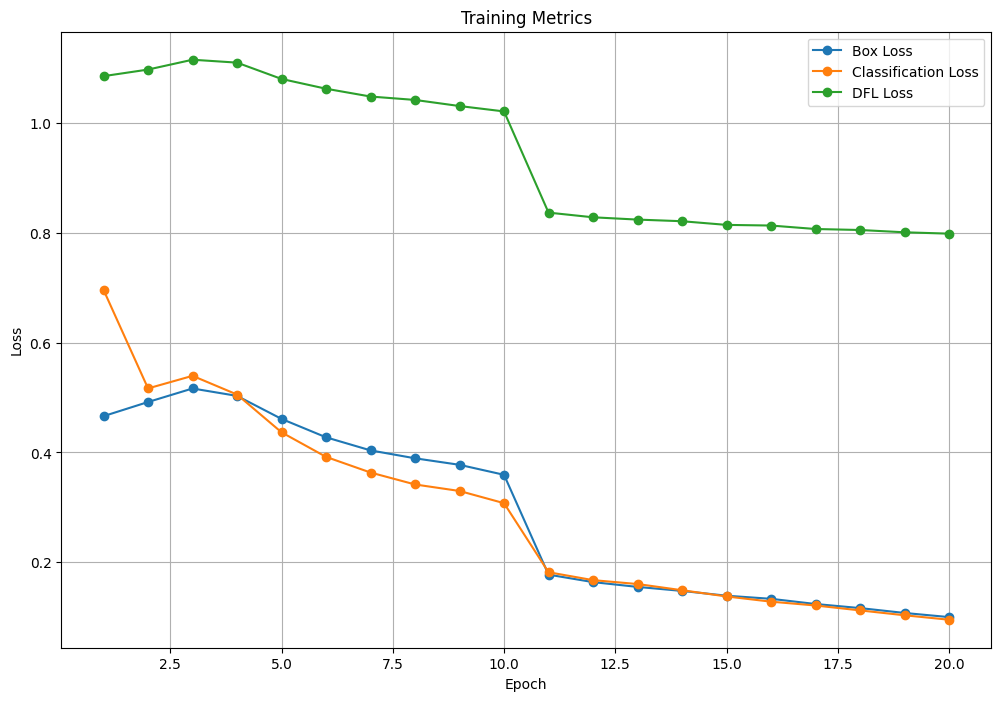

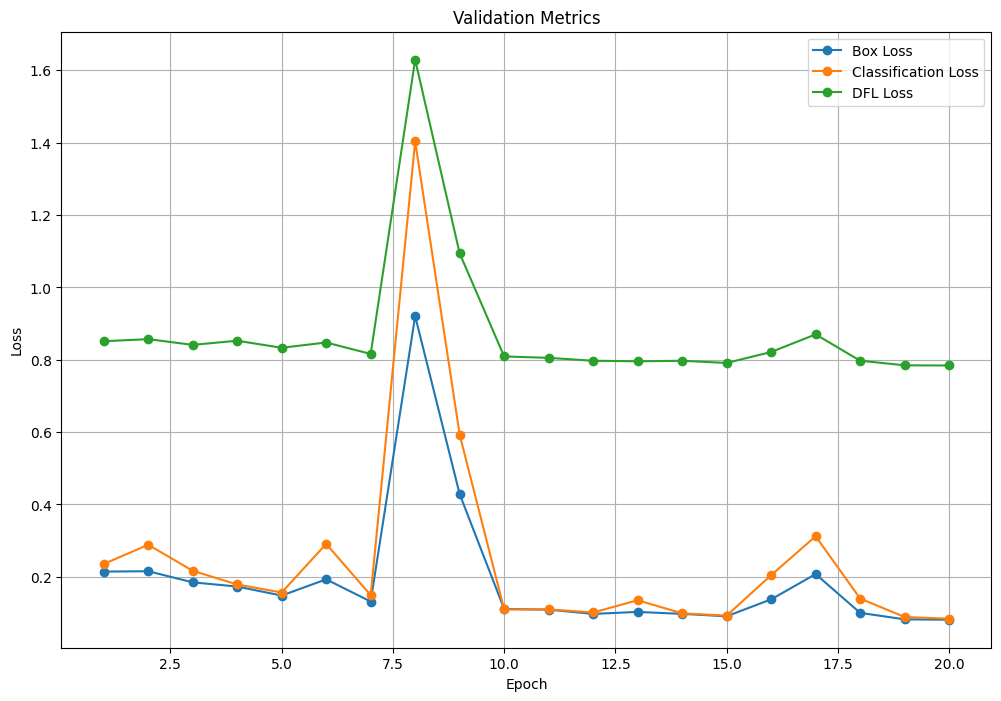

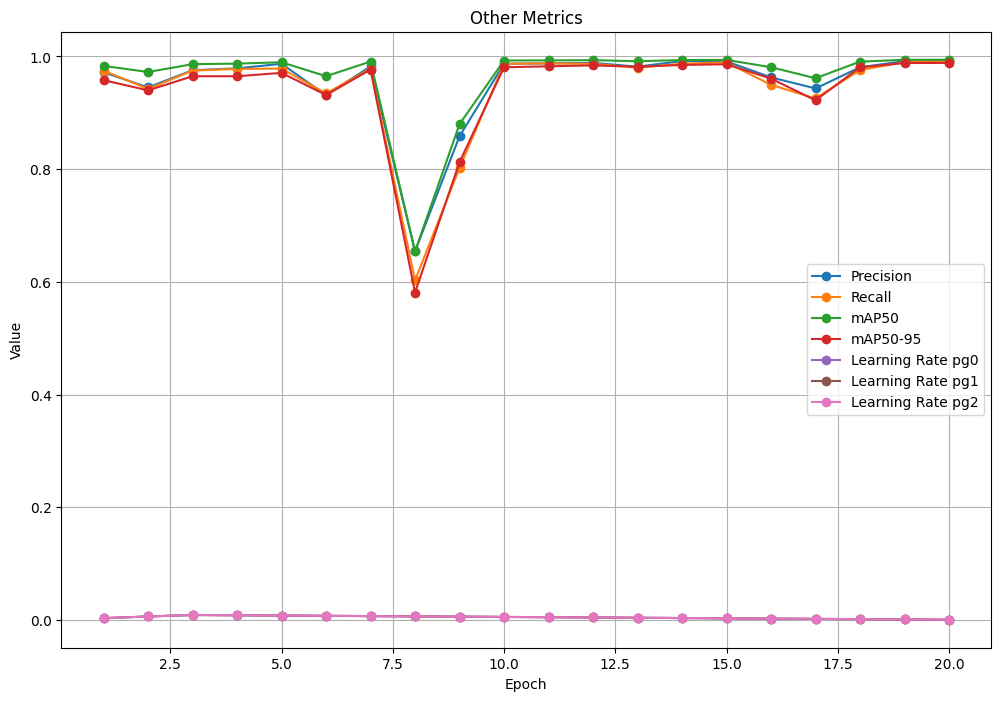

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
csv_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/results_latest_train.csv'
df = pd.read_csv(csv_file_path)

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Plotting function for metrics
def plot_metrics(df, metrics, title, ylabel, xlabel='Epoch', save_path=None):
    plt.figure(figsize=(12, 8))
    for metric, label in metrics:
        plt.plot(df['epoch'], df[metric], marker='o', linestyle='-', label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Training metrics to plot
training_metrics = [
    ('train/box_loss', 'Box Loss'),
    ('train/cls_loss', 'Classification Loss'),
    ('train/dfl_loss', 'DFL Loss'),
]

# Validation metrics to plot
validation_metrics = [
    ('val/box_loss', 'Box Loss'),
    ('val/cls_loss', 'Classification Loss'),
    ('val/dfl_loss', 'DFL Loss'),
]

# Other metrics to plot
other_metrics = [
    ('metrics/precision(B)', 'Precision'),
    ('metrics/recall(B)', 'Recall'),
    ('metrics/mAP50(B)', 'mAP50'),
    ('metrics/mAP50-95(B)', 'mAP50-95'),
    ('lr/pg0', 'Learning Rate pg0'),
    ('lr/pg1', 'Learning Rate pg1'),
    ('lr/pg2', 'Learning Rate pg2')
]

# Plot training metrics
plot_metrics(df, training_metrics, 'Training Metrics', 'Loss')

# Plot validation metrics
plot_metrics(df, validation_metrics, 'Validation Metrics', 'Loss')

# Plot other metrics
plot_metrics(df, other_metrics, 'Other Metrics', 'Value')

In [ ]:
# SAVE RUNS INTO GOOGLE DRIVE

import os
import shutil
from google.colab import drive

# Source directory
source_dir = '/content/runs'

# Destination directory on Google Drive
destination_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l'

# Create the destination directory if it does not exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Copy the entire folder to Google Drive
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
print(f"Folder copied to: {destination_dir}")

Folder copied to: /content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l


#**INFERENCE:**

### **SYNTHETIC TESTING DATASET:**

In [ ]:
# ANNOTATIONS:

from ultralytics import YOLO
import cv2
import os

# Load the pretrained YOLO model
model = YOLO('/content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/full_trained_model_YOLOv8l_medium_T4.pt')

# Path to the directory containing images
image_directory = '/content/Datasets/synthetic_testing'
output_directory = '/content/Datasets/synthetic_testing_results'

# Ensure output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_file in image_files:
    # Construct full image path
    image_path = os.path.join(image_directory, image_file)
    # Run inference on the image
    results = model(image_path)

    # Open a file to write the YOLO formatted annotations
    annotation_path = os.path.join(output_directory, image_file.rsplit('.', 1)[0] + '.txt')
    with open(annotation_path, 'w') as file:
        detections_found = False
        for result in results:
            if hasattr(result, 'boxes') and result.boxes.data.nelement() > 0:
                detections = result.boxes.data
                confidences = detections[:, 4]
                max_conf_index = confidences.argmax()
                best_detection = detections[max_conf_index]
                x1, y1, x2, y2, conf, cls_id = best_detection.int().tolist()

                # Normalize the bounding box coordinates
                img = cv2.imread(result.path)
                h, w, _ = img.shape
                x_center = ((x2 + x1) / 2) / w
                y_center = ((y2 + y1) / 2) / h
                width = (x2 - x1) / w
                height = (y2 - y1) / h

                # Write to file in YOLO format: class_id x_center y_center width height
                file.write(f"{cls_id} {x_center} {y_center} {width} {height}\n")
                detections_found = True

        if not detections_found:
            # Write "unidentified" if no detections were made
            file.write("unidentified\n")
            print(f"No bounding boxes found for {image_file}, wrote 'unidentified'.")

Example output (too long to show):

image 1/1 /content/Datasets/synthetic_testing/D1098590_186.png: 640x640 1 D1098590, 57.0ms
Speed: 1.5ms preprocess, 57.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D1612695_120.png: 640x640 1 D1612695, 52.5ms
Speed: 1.6ms preprocess, 52.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/synthetic_testing/D1100844_199.png: 640x640 1 D1100844, 51.9ms
Speed: 1.4ms preprocess, 51.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

......

In [ ]:
import os
import numpy as np
from PIL import Image
from collections import defaultdict

# Mapping class names to IDs
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file, img_width, img_height):
  """Parse YOLO format annotation file to extract bounding boxes and labels."""
    boxes = []
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
            except ValueError:
                print(f"Warning: Skipping invalid label '{data[0]}' in file {txt_file}")
                continue

            x_center = float(data[1]) * img_width
            y_center = float(data[2]) * img_height
            width = float(data[3]) * img_width
            height = float(data[4]) * img_height
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

    return boxes, labels

def calculate_iou(box1, box2):
  """Calculate Intersection over Union (IoU) between two bounding boxes."""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max < inter_x_min or inter_y_max < inter_y_min:
        return 0.0

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

def compare_annotations(real_dir, inferred_dir, img_dir, iou_threshold=0.5):
  """Compare real and inferred annotations, calculating classification accuracy and IoU."""
    real_files = [f for f in os.listdir(real_dir) if f.endswith('.txt')]
    inferred_files = [f for f in os.listdir(inferred_dir) if f.endswith('.txt')]

    total_files = len(real_files)
    correct_classifications = defaultdict(int)
    incorrect_classifications = defaultdict(int)
    undetected_classifications = defaultdict(int)
    total_iou_per_class = defaultdict(float)
    total_matches_per_class = defaultdict(int)
    classes = set()

    for real_file in real_files:
        base_name = real_file.replace('.txt', '')
        inferred_file = base_name + '.txt'
        img_file = base_name + '.png'

        if inferred_file not in inferred_files:
            print(f"Skipping {real_file}: no corresponding inferred file")
            continue

        img_path = os.path.join(img_dir, img_file)
        if not os.path.exists(img_path):
            print(f"Skipping {real_file}: no corresponding image file")
            continue

        img = Image.open(img_path)
        img_width, img_height = img.size

        real_boxes, real_labels = parse_yolo_annotation(os.path.join(real_dir, real_file), img_width, img_height)
        inferred_boxes, inferred_labels = parse_yolo_annotation(os.path.join(inferred_dir, inferred_file), img_width, img_height)

        detected_real_boxes = set()

        for r_idx, (r_box, r_label) in enumerate(zip(real_boxes, real_labels)):
            classes.add(r_label)
            best_iou = 0.0
            best_match_idx = -1

            for idx, (i_box, i_label) in enumerate(zip(inferred_boxes, inferred_labels)):
                if r_label == i_label:
                    iou = calculate_iou(r_box, i_box)
                    if iou > best_iou:
                        best_iou = iou
                        best_match_idx = idx

            if best_iou >= iou_threshold:
                correct_classifications[r_label] += 1
                total_iou_per_class[r_label] += best_iou
                total_matches_per_class[r_label] += 1
                detected_real_boxes.add(r_idx)
                del inferred_boxes[best_match_idx]
                del inferred_labels[best_match_idx]
            else:
                incorrect_classifications[r_label] += 1

        for r_idx in range(len(real_boxes)):
            if r_idx not in detected_real_boxes:
                undetected_classifications[real_labels[r_idx]] += 1

    # Calculate metrics
    overall_correct = sum(correct_classifications.values())
    overall_incorrect = sum(incorrect_classifications.values())
    overall_undetected = sum(undetected_classifications.values())
    overall_total_iou = sum(total_iou_per_class.values())
    overall_total_matches = sum(total_matches_per_class.values())
    overall_avg_iou = overall_total_iou / overall_total_matches if overall_total_matches > 0 else 0.0

    # Print metrics
    for label in sorted(classes):
        class_name = reverse_class_mapping.get(label, "Unknown")
        avg_iou = total_iou_per_class[label] / total_matches_per_class[label] if total_matches_per_class[label] > 0 else 0.0
        print(f"Class {label} ({class_name}):")
        print(f"  Correct classifications: {correct_classifications[label]}")
        print(f"  Incorrect classifications: {incorrect_classifications[label]}")
        print(f"  Undetected: {undetected_classifications[label]}")
        print(f"  Classification accuracy: {(correct_classifications[label] / (correct_classifications[label] + incorrect_classifications[label] + undetected_classifications[label])) * 100:.2f}%")
        print(f"  Average IoU: {avg_iou:.4f}")

    print("\nOverall:")
    print(f"  Total files: {total_files}")
    print(f"  Correct classifications: {overall_correct}")
    print(f"  Incorrect classifications: {overall_incorrect}")
    print(f"  Undetected: {overall_undetected}")
    print(f"  Classification accuracy: {(overall_correct / (overall_correct + overall_incorrect + overall_undetected)) * 100:.2f}%")
    print(f"  Average IoU: {overall_avg_iou:.4f}")

# Perform comparison
annotations_and_images_dir = '/content/Datasets/synthetic_testing'
inferred_annotations_dir = '/content/Datasets/synthetic_testing_results'

compare_annotations(annotations_and_images_dir, inferred_annotations_dir, annotations_and_images_dir)

Class 0 (D1098590):
  Correct classifications: 199
  Incorrect classifications: 1
  Undetected: 1
  Classification accuracy: 99.00%
  Average IoU: 0.9803
Class 1 (D1100844):
  Correct classifications: 200
  Incorrect classifications: 0
  Undetected: 0
  Classification accuracy: 100.00%
  Average IoU: 0.9764
Class 2 (D1612695):
  Correct classifications: 196
  Incorrect classifications: 4
  Undetected: 4
  Classification accuracy: 96.08%
  Average IoU: 0.9736
Class 3 (D1899542):
  Correct classifications: 200
  Incorrect classifications: 0
  Undetected: 0
  Classification accuracy: 100.00%
  Average IoU: 0.9771
Class 4 (D4332268):
  Correct classifications: 198
  Incorrect classifications: 2
  Undetected: 2
  Classification accuracy: 98.02%
  Average IoU: 0.9673

Overall:
  Total files: 1000
  Correct classifications: 993
  Incorrect classifications: 7
  Undetected: 7
  Classification accuracy: 98.61%
  Average IoU: 0.9750


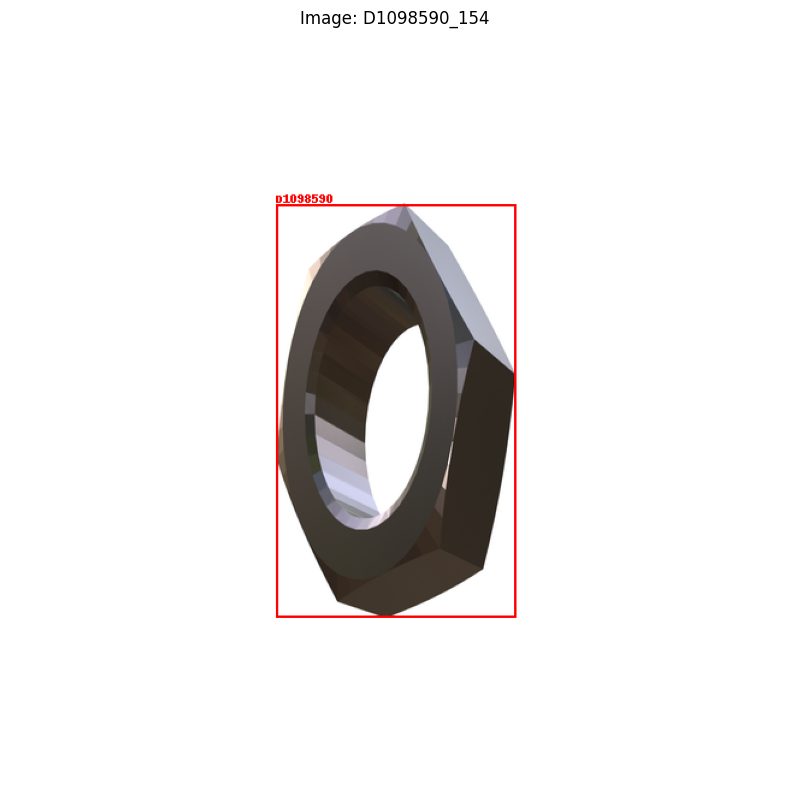

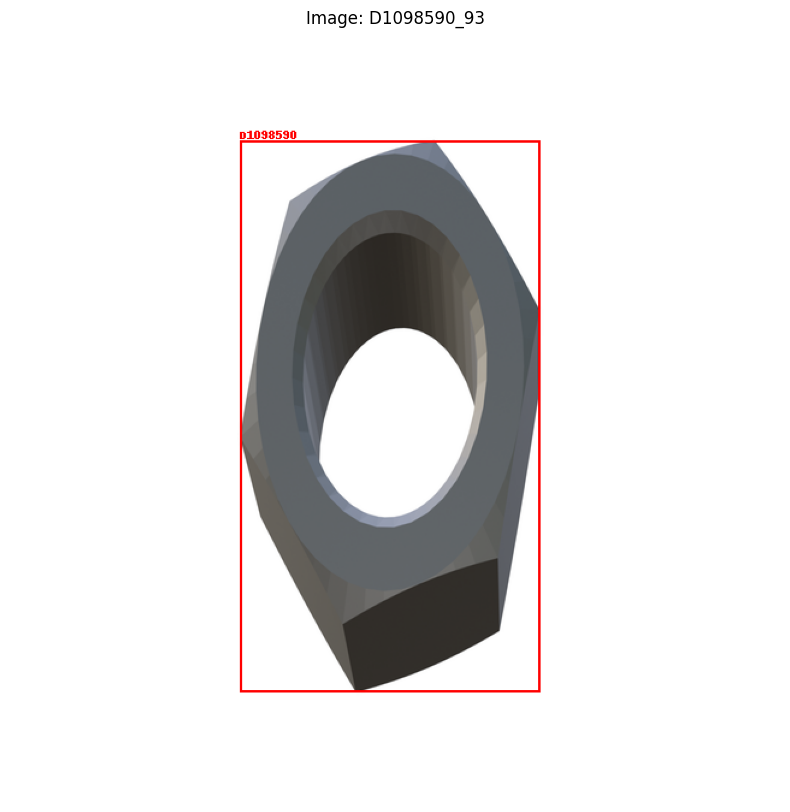

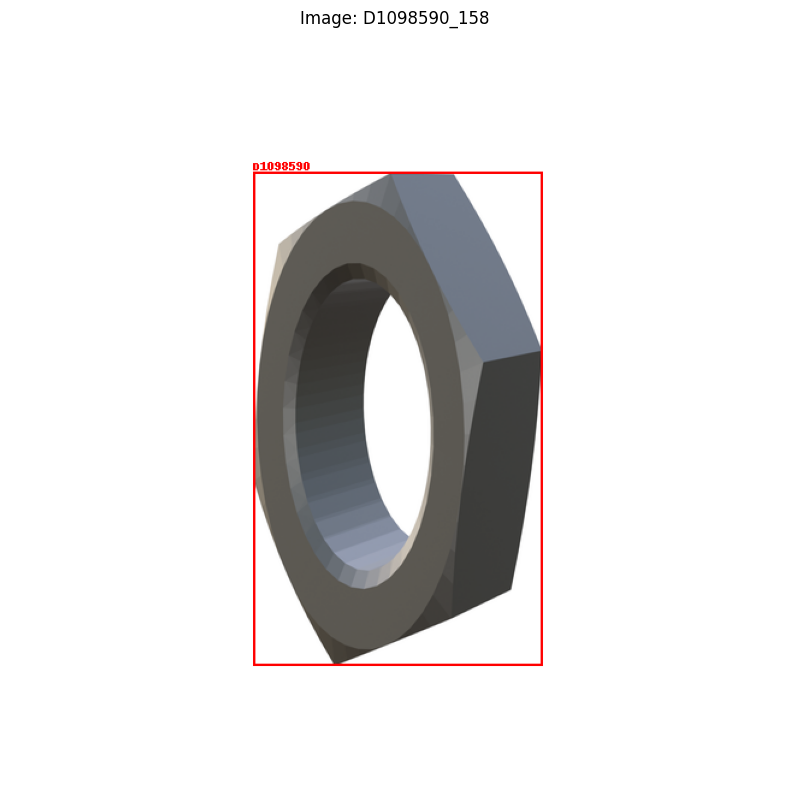

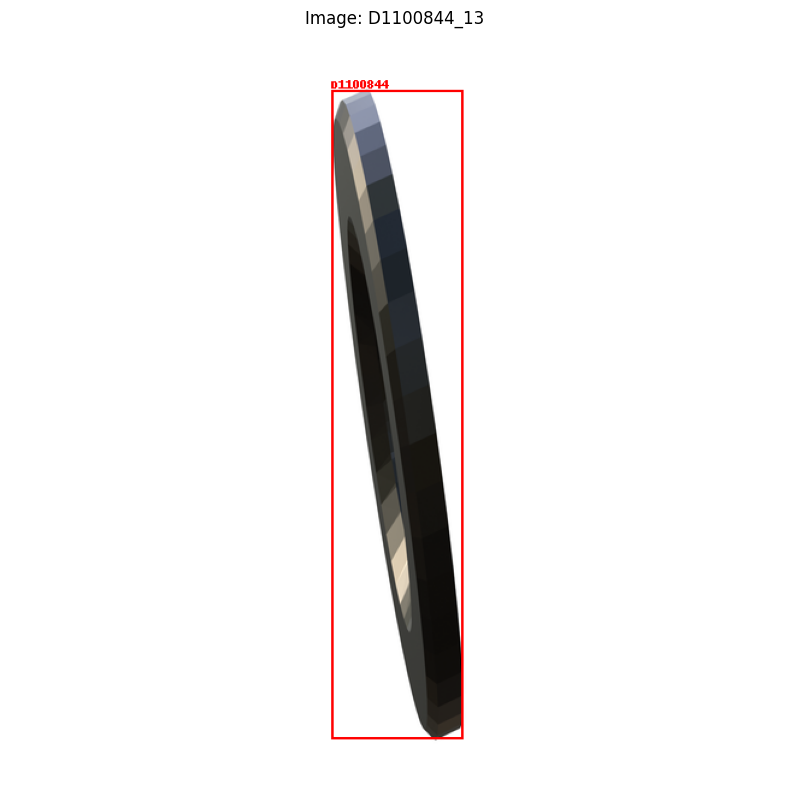

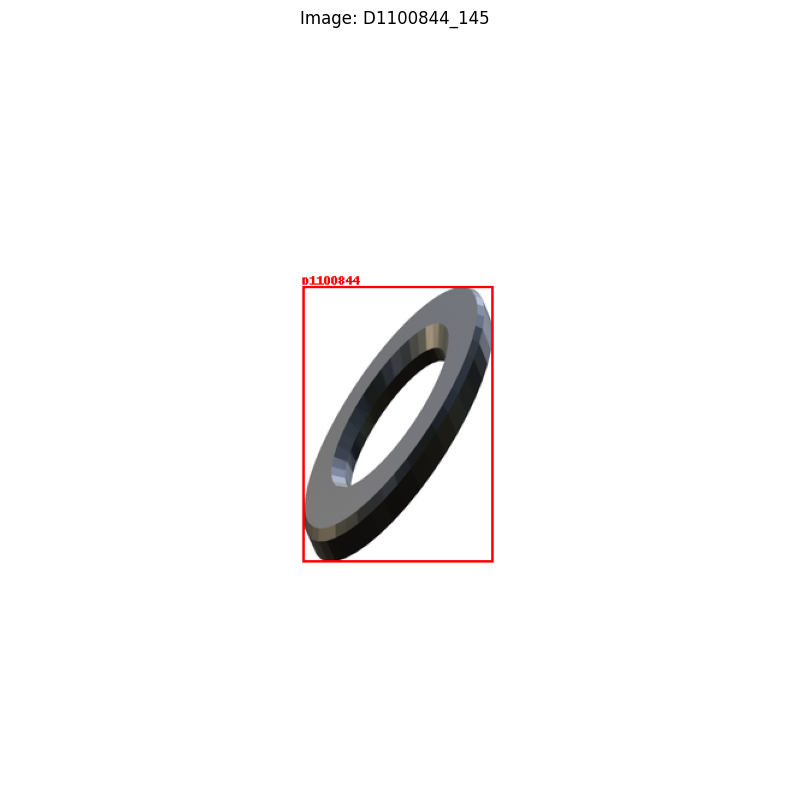

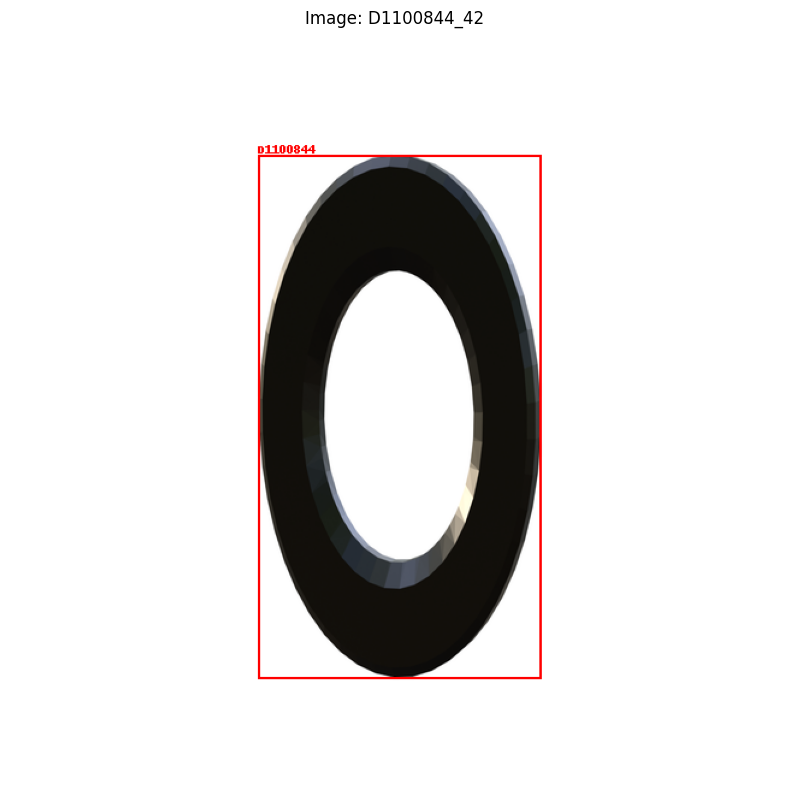

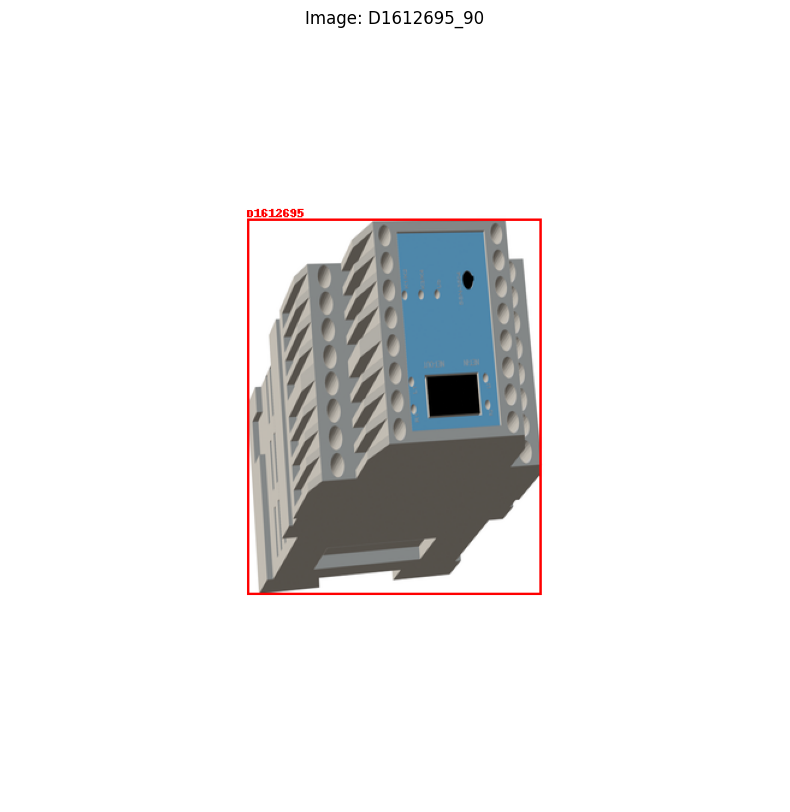

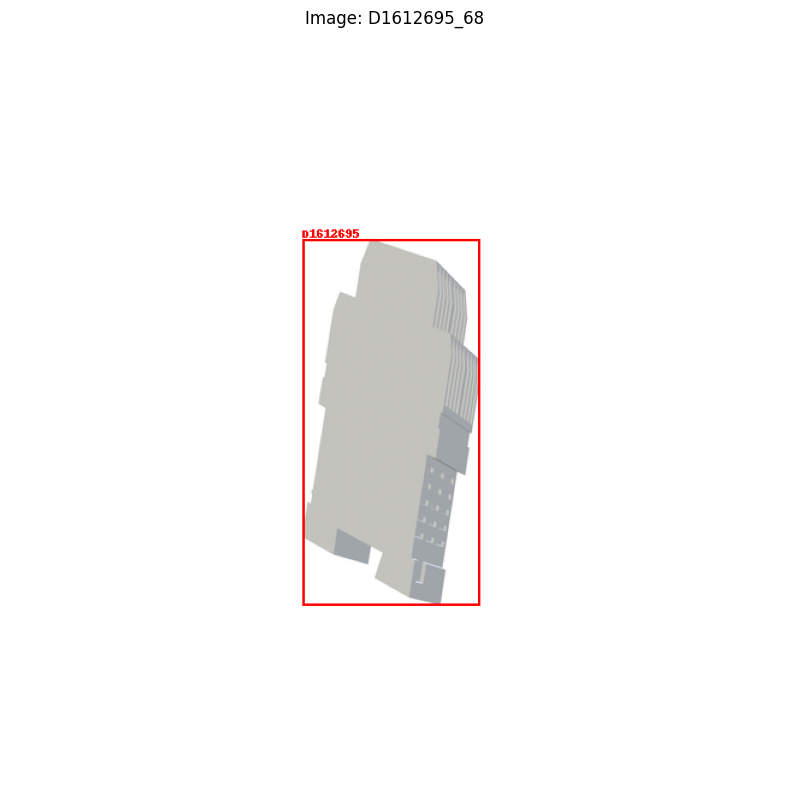

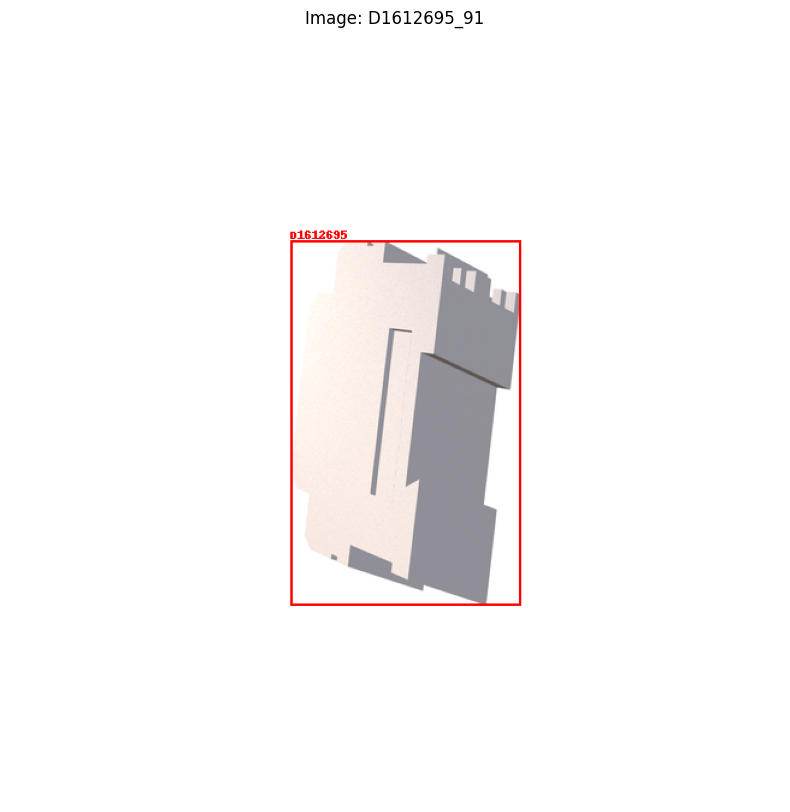

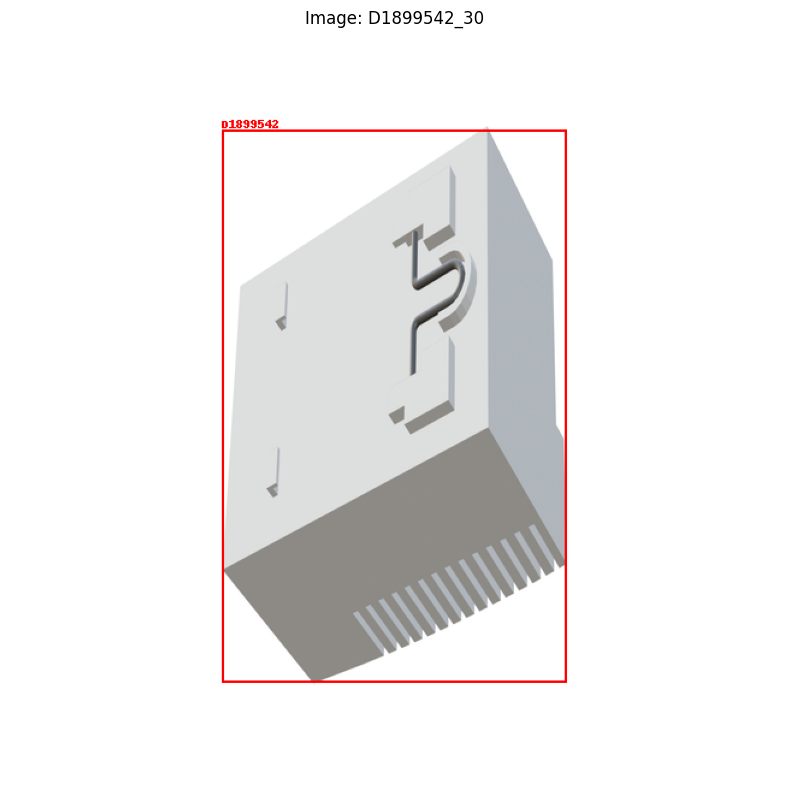

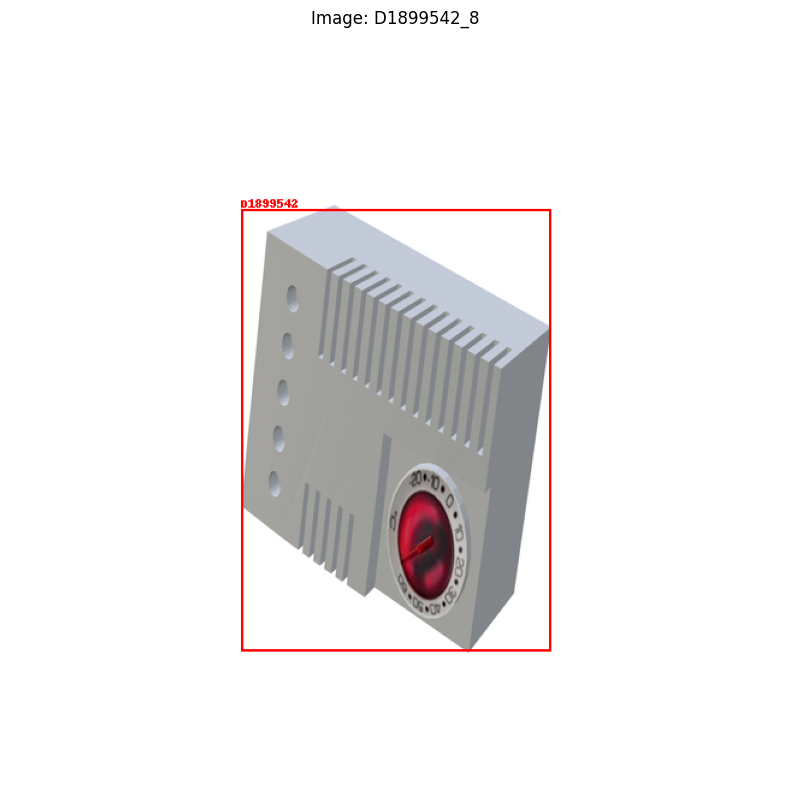

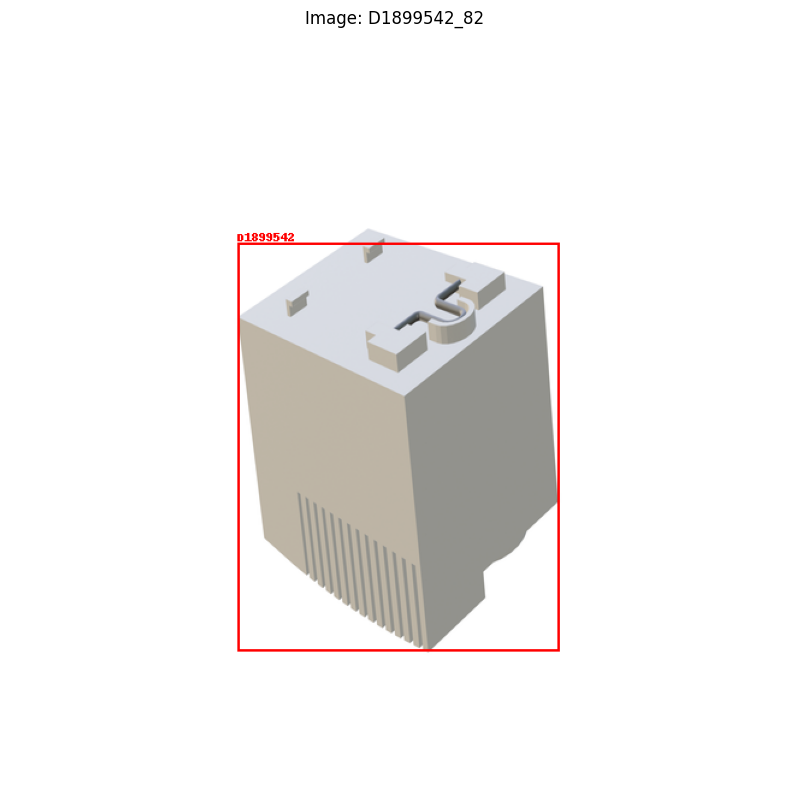

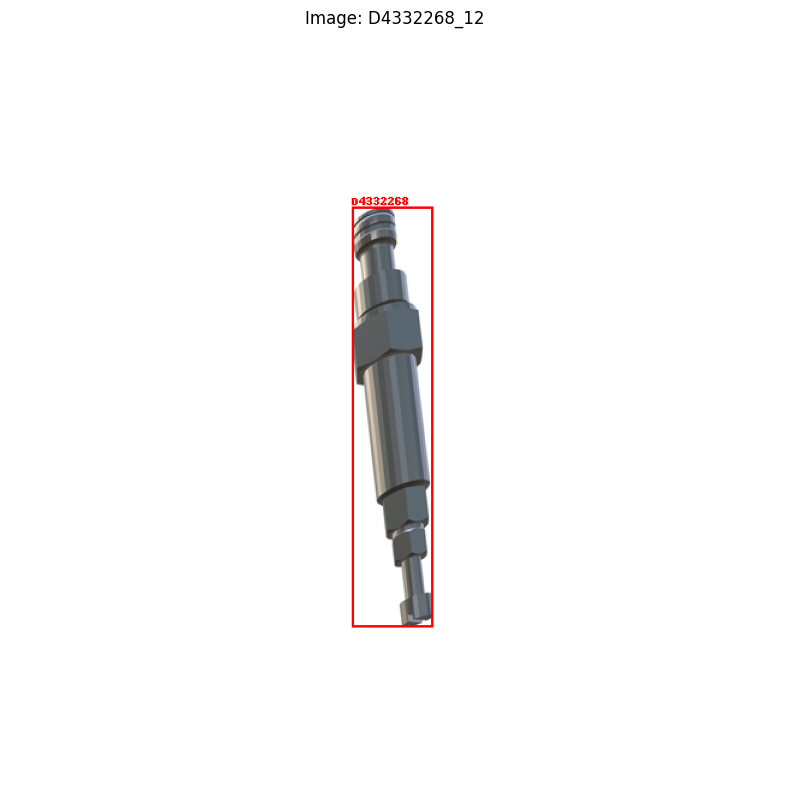

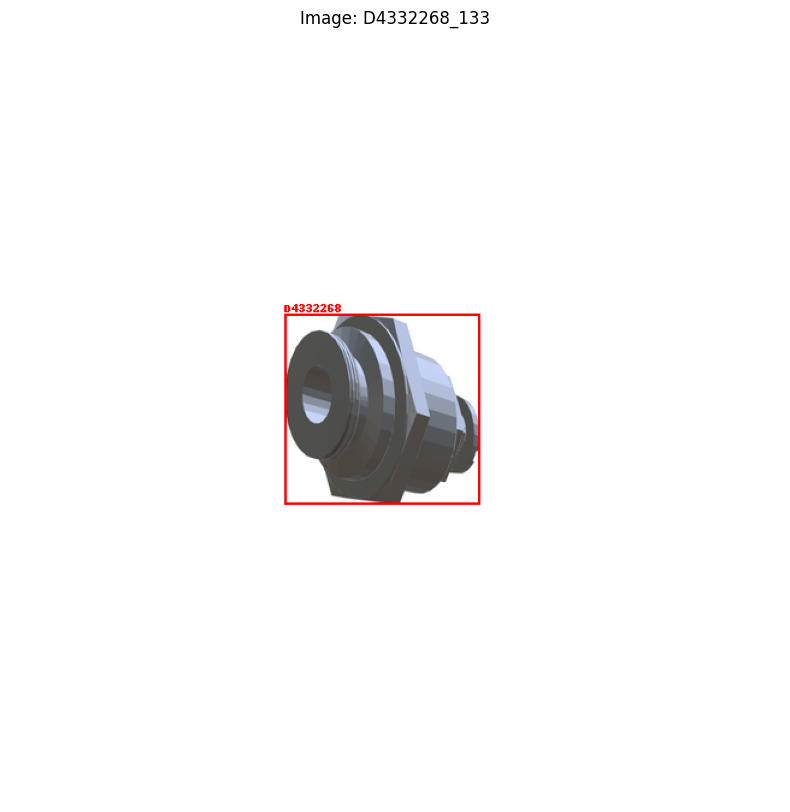

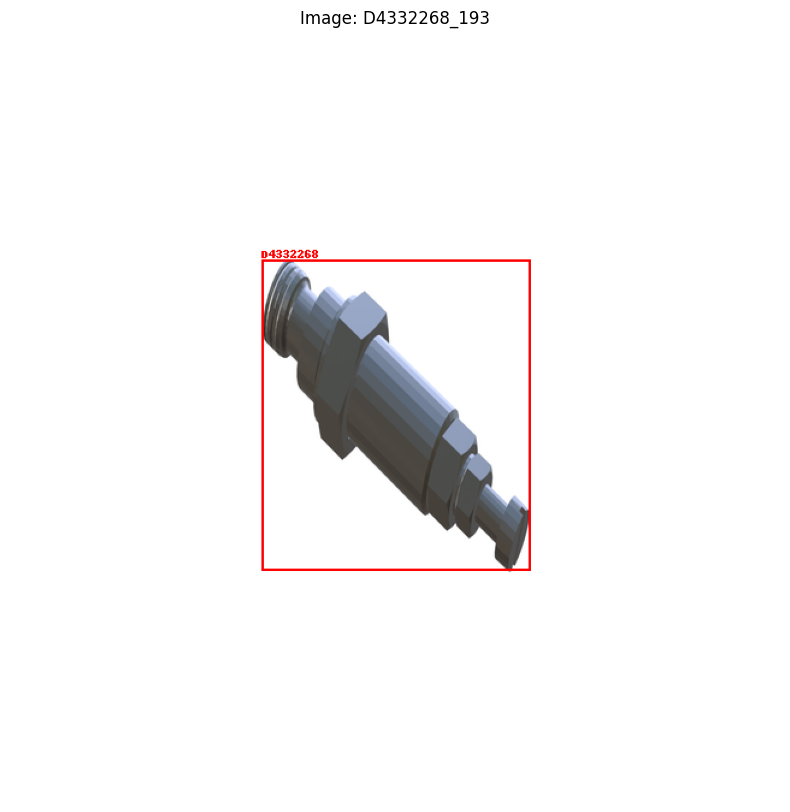

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from collections import defaultdict

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file, img_width, img_height):
    boxes = []
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
            except ValueError:
                print(f"Warning: Skipping invalid label '{data[0]}' in file {txt_file}")
                continue

            x_center = float(data[1]) * img_width
            y_center = float(data[2]) * img_height
            width = float(data[3]) * img_width
            height = float(data[4]) * img_height
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

    return boxes, labels

def visualize_images_with_annotations(img_dir, inferred_dir, num_images_per_class=3):
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]
    class_to_files = defaultdict(list)

    # Group images by class based on filename
    for img_file in img_files:
        class_name_from_file = img_file[:8]
        if class_name_from_file in class_mapping:
            label = class_mapping[class_name_from_file]
            class_to_files[label].append(img_file)

    # Select random images for each class and sort by class order
    selected_files = []
    for label in sorted(class_to_files.keys()):
        files = class_to_files[label]
        selected_files.extend(random.sample(files, min(num_images_per_class, len(files))))

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Visualize selected images with annotations
    for img_file in selected_files:
        base_name = img_file.replace('.png', '')
        inferred_file = base_name + '.txt'

        img_path = os.path.join(img_dir, img_file)
        inferred_path = os.path.join(inferred_dir, inferred_file)

        img = Image.open(img_path)
        img_width, img_height = img.size

        inferred_boxes, inferred_labels = parse_yolo_annotation(inferred_path, img_width, img_height)

        draw = ImageDraw.Draw(img)
        for box, label in zip(inferred_boxes, inferred_labels):
            xmin, ymin, xmax, ymax = box
            draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)
            class_name = reverse_class_mapping.get(label, "Unknown")
            text_position = (xmin, ymin - 10)
            draw.text(text_position, class_name, fill='red', font=font)

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title(f"Image: {base_name}")
        plt.axis('off')
        plt.show()

# Perform visualization
img_dir = '/content/Datasets/synthetic_testing'
inferred_dir = '/content/Datasets/synthetic_testing_results'

visualize_images_with_annotations(img_dir, inferred_dir)

### **REAL TESTING DATASET (internet imagery):**

In [ ]:
# ANNOTATIONS:

from ultralytics import YOLO
import cv2
import os

# Load the pretrained YOLO model
model = YOLO('/content/gdrive/MyDrive/Colab Notebooks/Data/MEDIUM COMPLEXITY - Fully trained model/YOLOv8l/full_trained_model_YOLOv8l_medium_T4.pt')

# Path to the directory containing images
image_directory = '/content/Datasets/actual_testing'
output_directory = '/content/Datasets/actual_testing_results'

# Ensure output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_file in image_files:
    # Construct full image path
    image_path = os.path.join(image_directory, image_file)
    # Run inference on the image
    results = model(image_path)

    # Open a file to write the YOLO formatted annotations
    annotation_path = os.path.join(output_directory, image_file.rsplit('.', 1)[0] + '.txt')
    with open(annotation_path, 'w') as file:
        detections_found = False
        for result in results:
            if hasattr(result, 'boxes') and result.boxes.data.nelement() > 0:
                detections = result.boxes.data
                confidences = detections[:, 4]
                max_conf_index = confidences.argmax()
                best_detection = detections[max_conf_index]
                x1, y1, x2, y2, conf, cls_id = best_detection.int().tolist()

                # Normalize the bounding box coordinates
                img = cv2.imread(result.path)
                h, w, _ = img.shape
                x_center = ((x2 + x1) / 2) / w
                y_center = ((y2 + y1) / 2) / h
                width = (x2 - x1) / w
                height = (y2 - y1) / h

                # Write to file in YOLO format: class_id x_center y_center width height
                file.write(f"{cls_id} {x_center} {y_center} {width} {height}\n")
                detections_found = True

        if not detections_found:
            # Write "unidentified" if no detections were made
            file.write("unidentified\n")
            print(f"No bounding boxes found for {image_file}, wrote 'unidentified'.")

Example output (too long to show):

image 1/1 /content/Datasets/actual_testing/D1899542_4.png: 640x640 1 D1612695, 744.6ms
Speed: 14.4ms preprocess, 744.6ms inference, 1212.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Datasets/actual_testing/D1899542_14.png: 640x448 1 D1899542, 456.0ms
Speed: 1.5ms preprocess, 456.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/Datasets/actual_testing/D1098590_16.png: 544x640 (no detections), 522.6ms
Speed: 1.9ms preprocess, 522.6ms inference, 0.4ms postprocess per image at shape (1, 3, 544, 640)
No bounding boxes found for D1098590_16.png, wrote 'unidentified'.

.....

In [ ]:
import os
from collections import defaultdict

# Class mapping
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file):
  """Parse YOLO format annotation file to extract labels."""
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
                labels.append(label)
            except ValueError:
                continue

    return labels

def compare_annotations(inferred_dir, image_dir):
  """Comparing inferred annotations with correct classes, calculating classification accuracy."""
    inferred_files = [f for f in os.listdir(inferred_dir) if f.endswith('.txt')]
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    total_files = len(image_files)
    correct_classifications = defaultdict(int)
    incorrect_classifications = defaultdict(int)
    undetected_classifications = defaultdict(int)
    classes = set()

    for image_file in image_files:
        base_name = os.path.splitext(image_file)[0]
        class_name_from_file = base_name[:8]
        inferred_file = base_name + '.txt'
        inferred_path = os.path.join(inferred_dir, inferred_file)

        if class_name_from_file not in class_mapping:
            continue

        expected_label = class_mapping[class_name_from_file]
        classes.add(expected_label)

        if not os.path.exists(inferred_path):
            undetected_classifications[expected_label] += 1
            continue

        inferred_labels = parse_yolo_annotation(inferred_path)

        if not inferred_labels:
            undetected_classifications[expected_label] += 1
            continue

        inferred_label = inferred_labels[0]  # assuming only one label per file

        if expected_label == inferred_label:
            correct_classifications[expected_label] += 1
        else:
            incorrect_classifications[expected_label] += 1

    # Calculate metrics
    overall_correct = sum(correct_classifications.values())
    overall_incorrect = sum(incorrect_classifications.values())
    overall_undetected = sum(undetected_classifications.values())

    # Print metrics
    for label in sorted(classes):
        class_name = reverse_class_mapping.get(label, "Unknown")
        total_classifications = correct_classifications[label] + incorrect_classifications[label] + undetected_classifications[label]
        classification_accuracy = (correct_classifications[label] / total_classifications) * 100 if total_classifications > 0 else 0
        print(f"Class {label} ({class_name}):")
        print(f"  Correct classifications: {correct_classifications[label]}")
        print(f"  Incorrect classifications: {incorrect_classifications[label]}")
        print(f"  Undetected classifications: {undetected_classifications[label]}")
        print(f"  Classification accuracy: {classification_accuracy:.2f}%")

    overall_accuracy = (overall_correct / total_files) * 100 if total_files > 0 else 0
    print("\nOverall:")
    print(f"  Total files: {total_files}")
    print(f"  Correct classifications: {overall_correct}")
    print(f"  Incorrect classifications: {overall_incorrect}")
    print(f"  Undetected classifications: {overall_undetected}")
    print(f"  Classification accuracy: {overall_accuracy:.2f}%")

# Perform comparison
inferred_annotations_dir = '/content/Datasets/actual_testing_results'
image_dir = '/content/Datasets/actual_testing'

compare_annotations(inferred_annotations_dir, image_dir)

Class 0 (D1098590):
  Correct classifications: 5
  Incorrect classifications: 6
  Undetected classifications: 9
  Classification accuracy: 25.00%
Class 1 (D1100844):
  Correct classifications: 5
  Incorrect classifications: 2
  Undetected classifications: 13
  Classification accuracy: 25.00%
Class 2 (D1612695):
  Correct classifications: 4
  Incorrect classifications: 0
  Undetected classifications: 1
  Classification accuracy: 80.00%
Class 3 (D1899542):
  Correct classifications: 12
  Incorrect classifications: 6
  Undetected classifications: 2
  Classification accuracy: 60.00%
Class 4 (D4332268):
  Correct classifications: 2
  Incorrect classifications: 13
  Undetected classifications: 5
  Classification accuracy: 10.00%

Overall:
  Total files: 85
  Correct classifications: 28
  Incorrect classifications: 27
  Undetected classifications: 30
  Classification accuracy: 32.94%


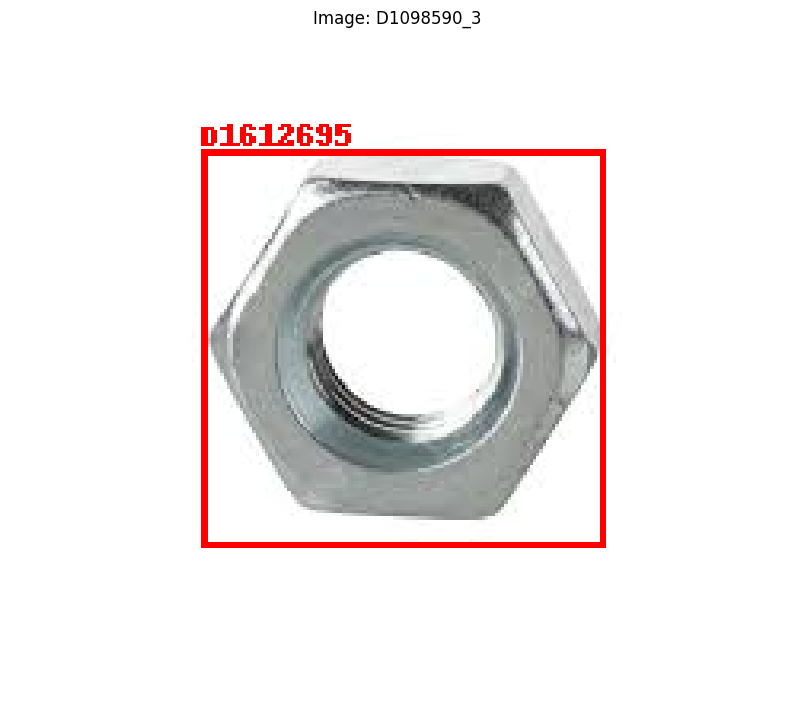

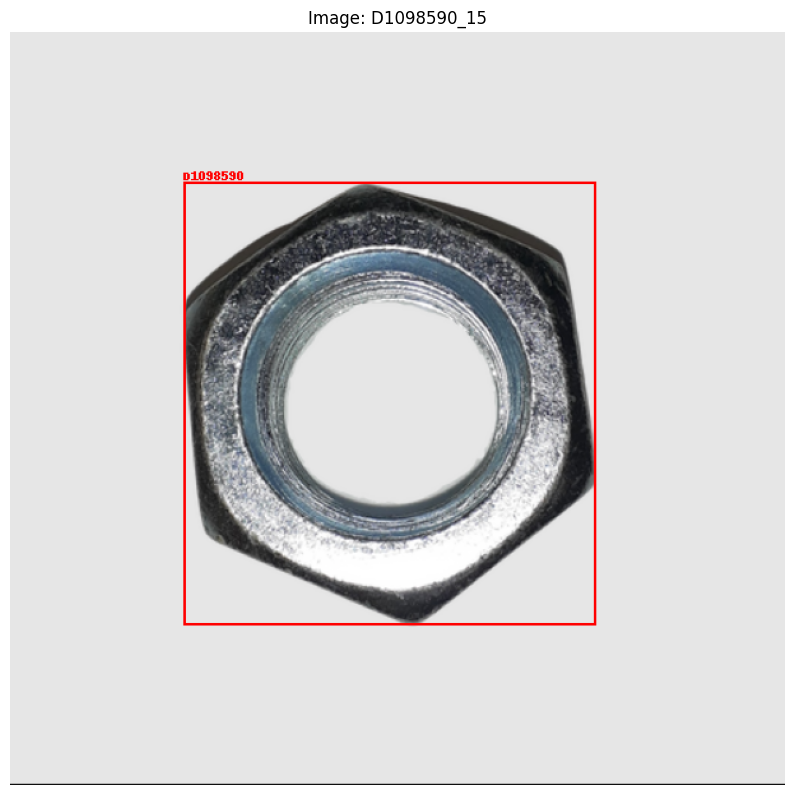

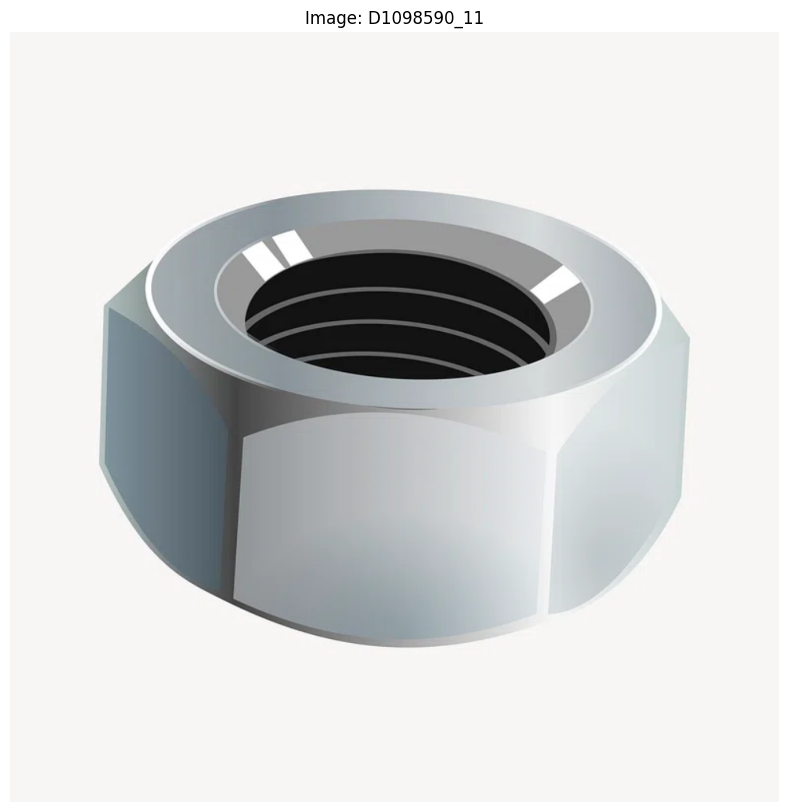

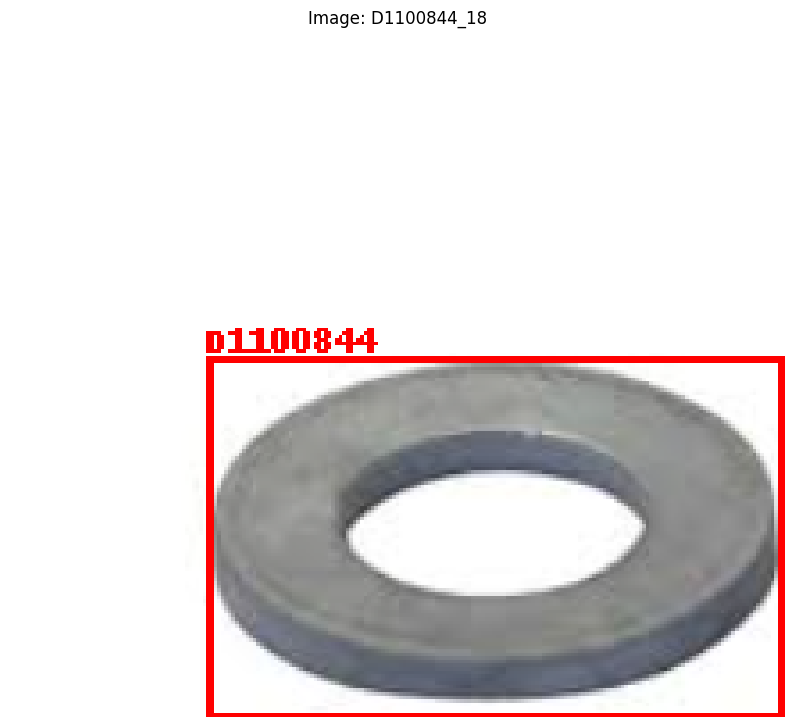

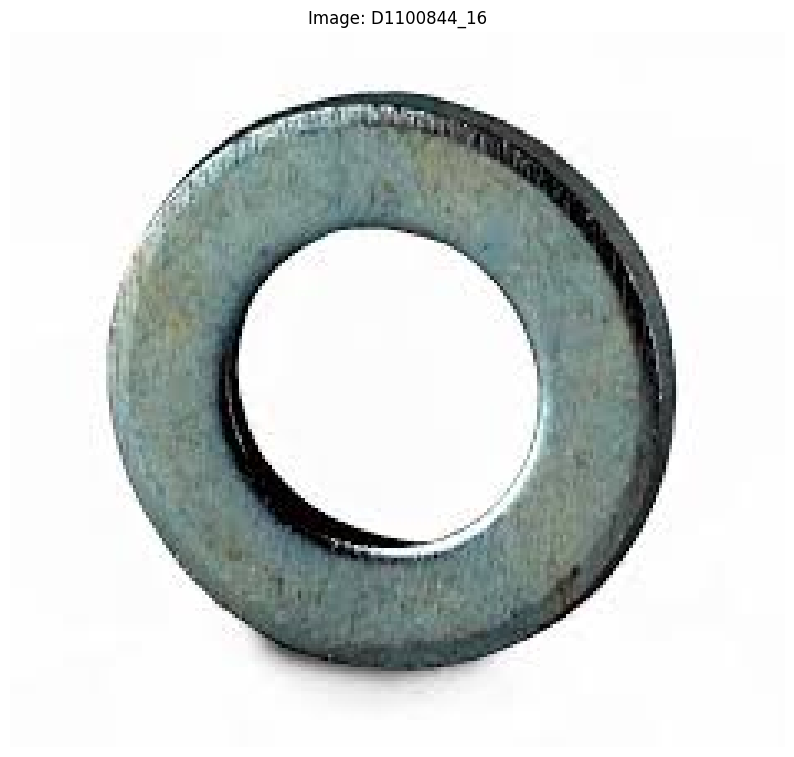

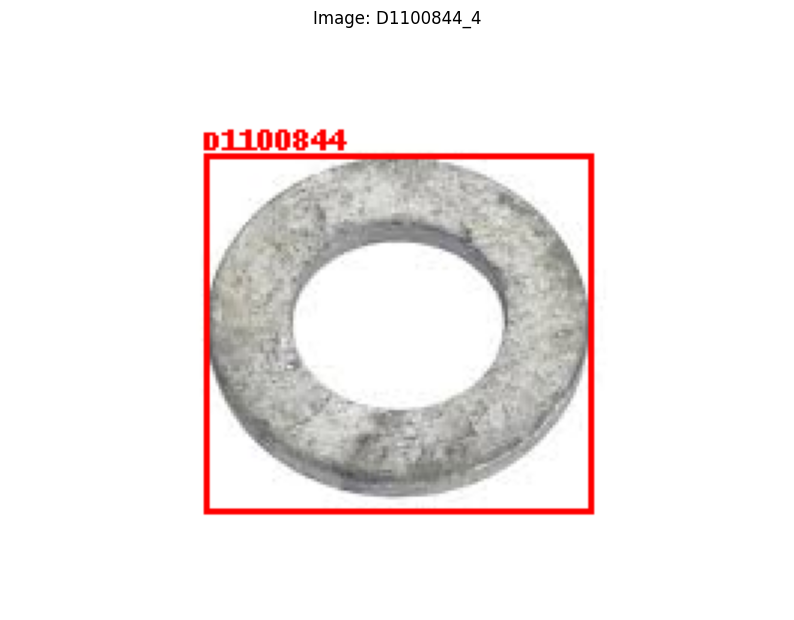

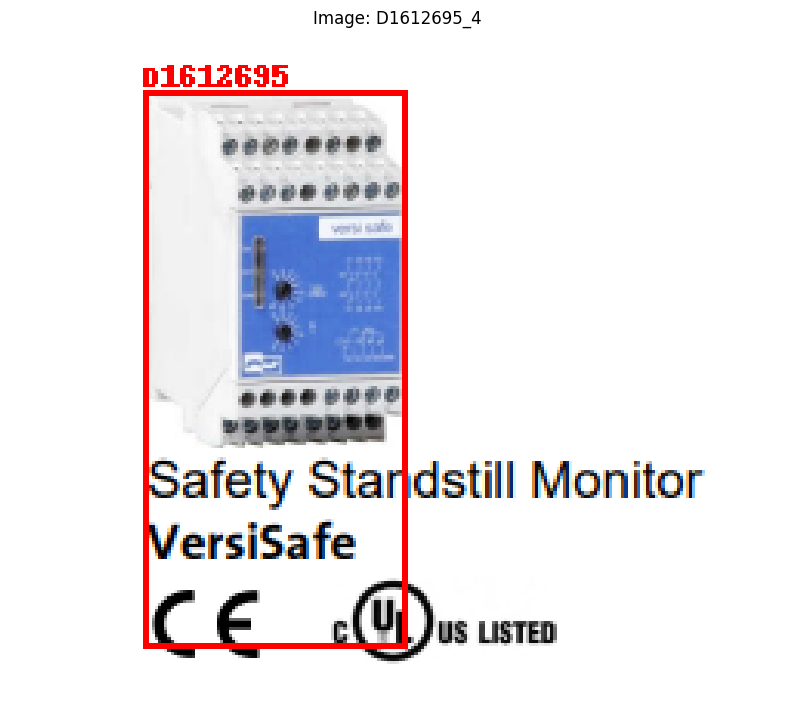

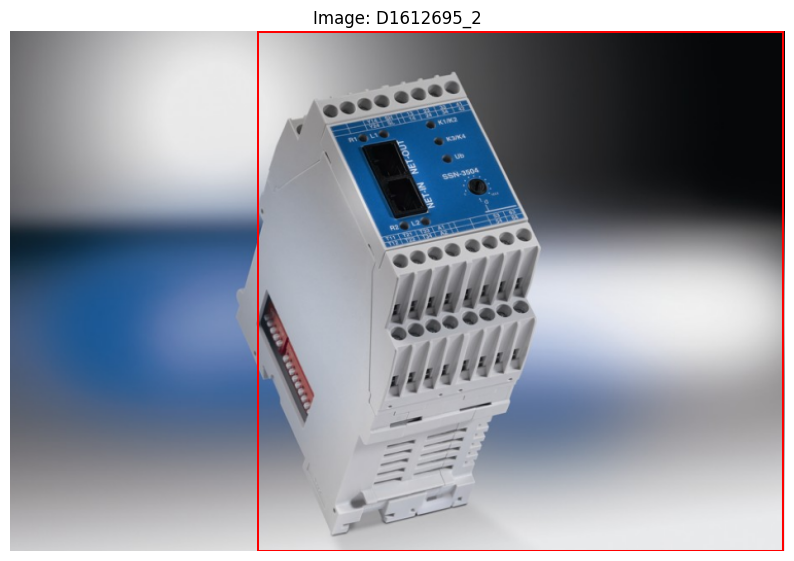

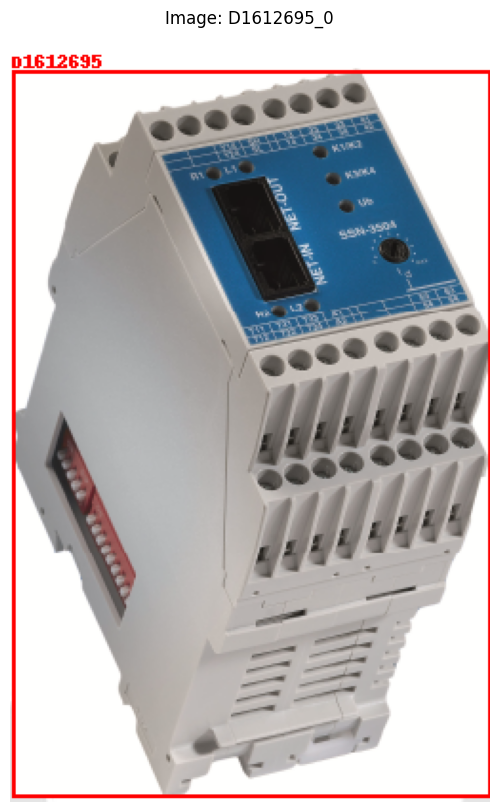

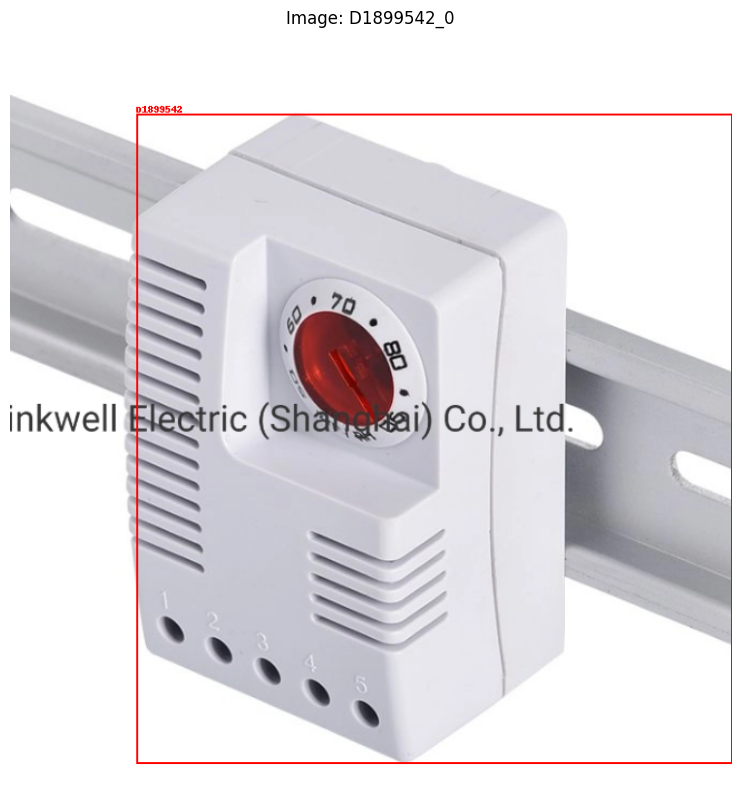

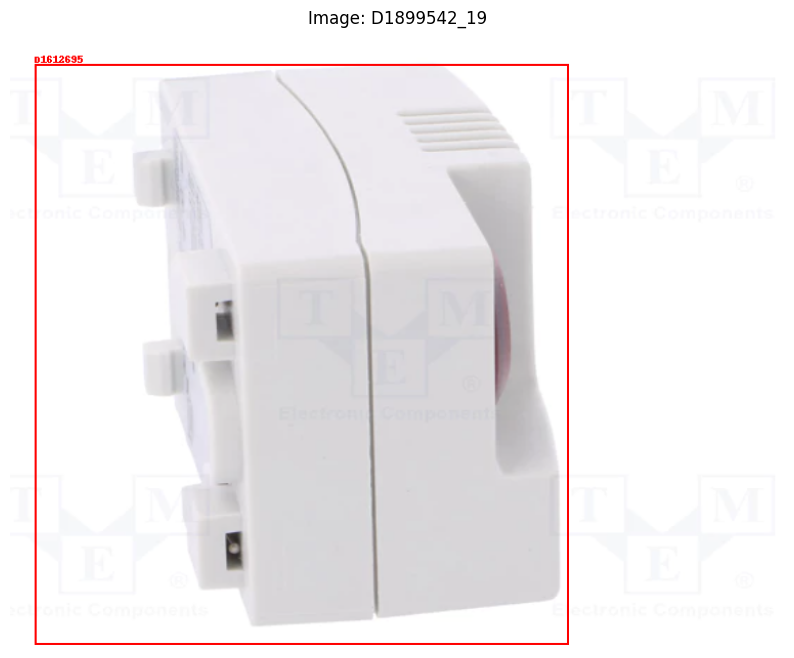

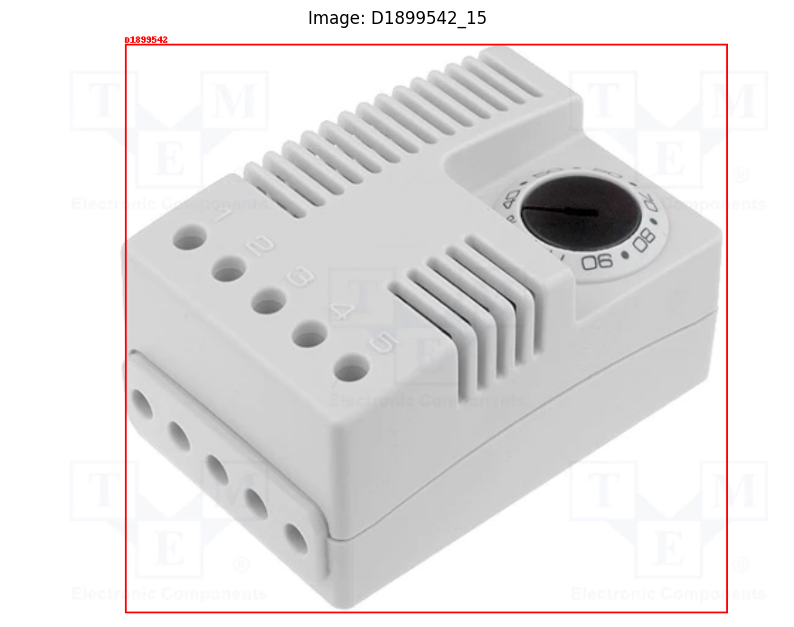

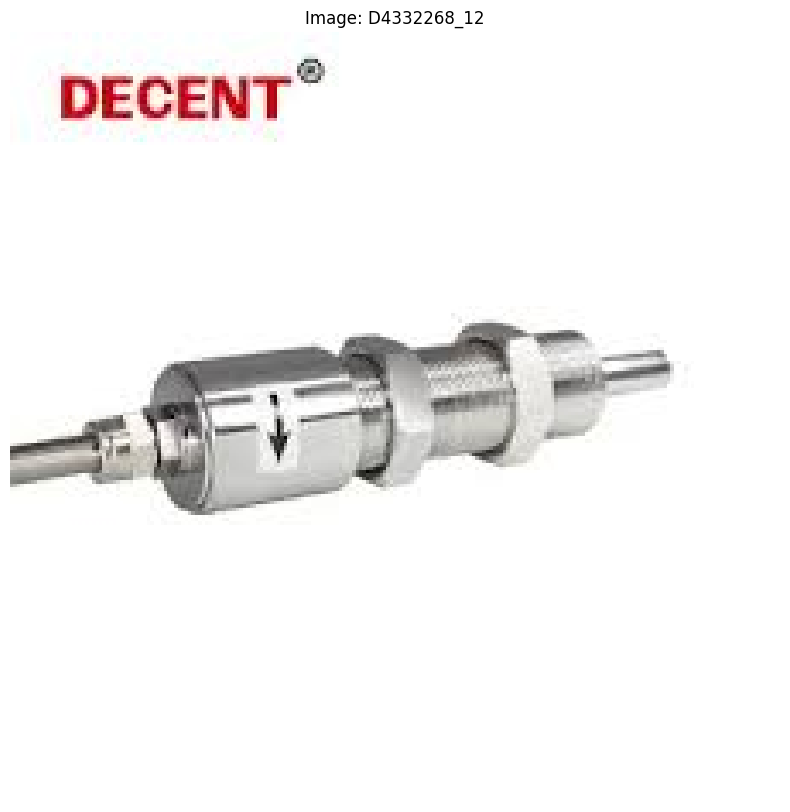

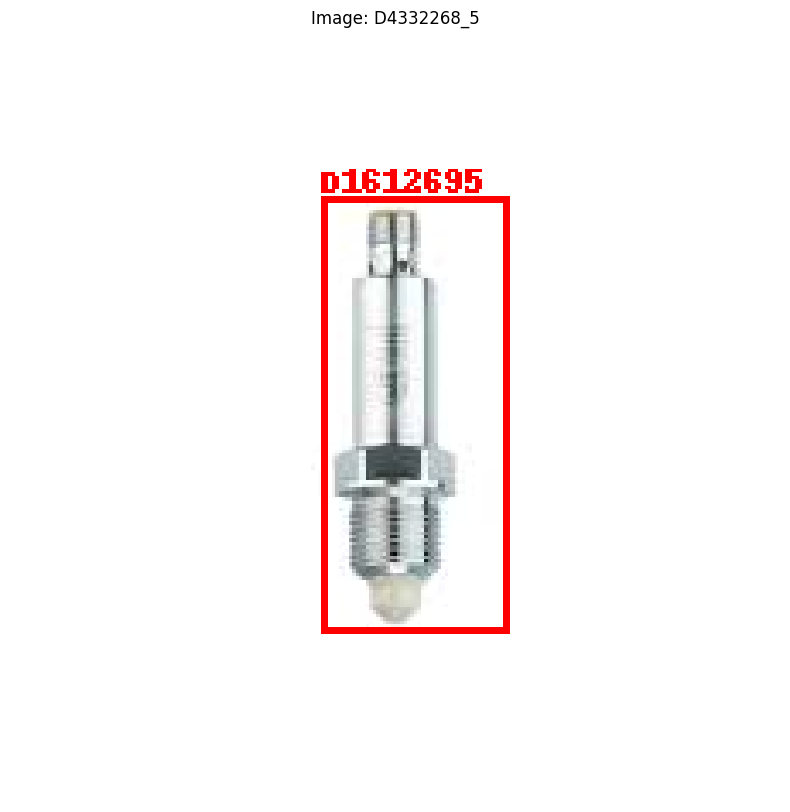

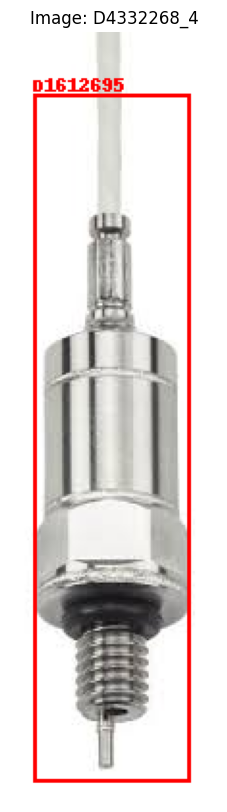

In [ ]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from collections import defaultdict

# Class mapping starting from 0
class_mapping = {
    'D1098590': 0,
    'D1100844': 1,
    'D1612695': 2,
    'D1899542': 3,
    'D4332268': 4,
}

# Reverse the class mapping for easier lookup by class index
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

def parse_yolo_annotation(txt_file, img_width, img_height):
  """Parse YOLO format annotation file to extract labels."""
    boxes = []
    labels = []

    with open(txt_file, 'r') as f:
        for line in f:
            data = line.strip().split()
            try:
                label = int(data[0])
            except ValueError:
                print(f"Warning: Skipping invalid label '{data[0]}' in file {txt_file}")
                continue

            x_center = float(data[1]) * img_width
            y_center = float(data[2]) * img_height
            width = float(data[3]) * img_width
            height = float(data[4]) * img_height
            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

    return boxes, labels

def visualize_images_with_annotations(img_dir, inferred_dir, num_images_per_class=3):
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]
    class_to_files = defaultdict(list)

    # Group images by class based on filename
    for img_file in img_files:
        class_name_from_file = img_file[:8]
        if class_name_from_file in class_mapping:
            label = class_mapping[class_name_from_file]
            class_to_files[label].append(img_file)

    # Select random images for each class and sort by class order
    selected_files = []
    for label in sorted(class_to_files.keys()):
        files = class_to_files[label]
        selected_files.extend(random.sample(files, min(num_images_per_class, len(files))))

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Visualize selected images with annotations
    for img_file in selected_files:
        base_name = img_file.replace('.png', '')
        inferred_file = base_name + '.txt'

        img_path = os.path.join(img_dir, img_file)
        inferred_path = os.path.join(inferred_dir, inferred_file)

        img = Image.open(img_path)
        img_width, img_height = img.size

        inferred_boxes, inferred_labels = parse_yolo_annotation(inferred_path, img_width, img_height)

        draw = ImageDraw.Draw(img)
        for box, label in zip(inferred_boxes, inferred_labels):
            xmin, ymin, xmax, ymax = box
            draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)
            class_name = reverse_class_mapping.get(label, "Unknown")
            text_position = (xmin, ymin - 10)
            draw.text(text_position, class_name, fill='red', font=font)

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title(f"Image: {base_name}")
        plt.axis('off')
        plt.show()

# Perform visualization
img_dir = '/content/Datasets/actual_testing'
inferred_dir = '/content/Datasets/actual_testing_results'

visualize_images_with_annotations(img_dir, inferred_dir)